In [1]:
# Standard libraries
from itertools import chain
from ast import literal_eval

# Scientific libraries
import pandas as pd
from numpy import array
import matplotlib.pyplot as plt

# Parallelization library
from joblib import Parallel, delayed

# Utility functions
from helpers.helpers_spotify import get_enao_genre_data
from helpers.helpers_pandas import contains_any

Load the data

In [2]:
df = pd.read_pickle('../Data/pkl/01_spotify_data_(notna).pkl')

# Import EveryNoise data

  
<img src="../Images/Enao-genres-map.jpg" alt="Every Noise" style="height: 1000px;"/>

## Get smilar Genres

### scrapper for *genremap*

Goes to the website and enters each genre link and scraps the html. Grabs the related genres, opposite genres, and uses the font size for each as a  indicator of edge 'weight'. Also gets the Spotify playlist links.

Source:
- [https://github.com/sofielange98/every-noise-network-analysis](https://github.com/sofielange98/every-noise-network-analysis)
- [https://github.com/aweitz/EveryNoise](https://github.com/aweitz/EveryNoise)

In [3]:
def genre_scraper(genres):
    """Scrap EveryNoise data associated to a list of genres.

    Args:
        genres (list): list of genres for which to scrap ENAO data

    Returns:
        pd.DataFrame: the info scrapped for each genre, organized in a DF
    """
    if isinstance(genres, str):
        genres = [genres]
    genres_data = Parallel(n_jobs=-1)(delayed(get_enao_genre_data)(genre) for genre in genres)
    return pd.DataFrame(genres_data)

In [4]:
# Print unique genres count and list of genres
my_unique_genres = list(set(chain.from_iterable(df['genres'].to_list())))
print(f"The spotify data includes {len(my_unique_genres)} different genres:")
my_unique_genres

The spotify data includes 973 different genres:


['musica andina',
 'psybass',
 'cologne electronic',
 'miami hip hop',
 'high-tech minimal',
 'psychill',
 'zilizopendwa',
 'focus',
 'samoan pop',
 'experimental',
 'rap',
 'nouvelle chanson francaise',
 'son cubano',
 'canadian electronic',
 'pop rock',
 'deep pop edm',
 'glitch hop',
 'nz pop',
 'welsh indie',
 'deep turkish pop',
 'arab alternative',
 'deep new americana',
 'chicha',
 'contemporary vocal jazz',
 'jazz pop',
 'focus trance',
 'french soundtrack',
 'outlaw country',
 'lo-fi brasileiro',
 'chill beats',
 'chanson quebecois',
 'israeli indie',
 'jazz quartet',
 'deep chill',
 'greek jazz',
 'african electronic',
 'florida rap',
 'symfonicky orchestr',
 'nordic ambient',
 'tropical',
 'modern alternative rock',
 'classic afrobeat',
 'trance brasileiro',
 'dutch moombahton',
 'kora',
 'australian singer-songwriter',
 'minimal dub',
 'soul',
 'japanese electronic',
 'modern bollywood',
 'soukous',
 'nordic folk',
 'kawaii future bass',
 'mexican indie',
 'indie rock',
 'a

In [5]:
# Extract ENAO data for each genre
enao_df = genre_scraper(my_unique_genres)
enao_df

,genre,sim_genres,sim_weights,opp_genres,opp_weights,main_artists,artists_weights,spotify_url
0,musica andina,"[folklore cuyano, banjo, french movie tunes, r...","[100, 100, 100, 102, 100, 100, 100, 101, 104, ...","[swiss alternative rock, heavy gothic rock, ko...","[104, 100, 112, 141, 140, 150, 124, 132, 126, ...","[Los Chasquis, Ukamau, UÃ±a Ramos, Horizontes,...","[100, 101, 108, 110, 102, 101, 113, 101, 107, ...",https://open.spotify.com/playlist/5iTCp7UPV9Wh...
1,psybass,"[uk bass, glitch hop, deep progressive trance,...","[101, 104, 100, 103, 112, 103, 103, 100, 104, ...","[south african choral, christian a cappella, j...","[114, 101, 110, 102, 103, 123, 126, 158, 160, ...","[Detox Unit, GrymeTyme, Bogtrotter, Droplitz, ...","[121, 101, 109, 104, 122, 107, 118, 107, 104, ...",https://open.spotify.com/playlist/2G9uoCA4NEEL...
2,cologne electronic,"[somatik techno, bleep techno, experimental ho...","[101, 101, 103, 104, 100, 104, 118, 100, 102, ...","[ohio indie, gospel, zcc, clap and tap, starog...","[104, 111, 103, 123, 120, 112, 100, 111, 102, ...","[Black Manual, The Modernist, The Black Frame,...","[102, 104, 101, 107, 139, 114, 129, 104, 101, ...",https://open.spotify.com/playlist/5KcfGqyKiDx3...
3,miami hip hop,"[hindi hip hop, dirty south rap, australian hi...","[101, 112, 100, 101, 101, 100, 100, 109, 104, ...","[bagpipe marching band, drone psych, new weird...","[160, 123, 121, 116, 104, 106, 120, 117, 120, ...","[Pitbull, Dayou, Anquette, Kat Dahlia, L'Trimm...","[136, 100, 100, 106, 101, 118, 114, 116, 102, ...",https://open.spotify.com/playlist/4F2wv2RnXpmV...
4,high-tech minimal,"[deep deep house, romanian electronic, israeli...","[100, 102, 102, 104, 104, 100, 103, 101, 101, ...","[bulgarian folk, albanian folk, shantykoren, s...","[153, 119, 130, 113, 100, 105, 102, 107, 106, ...","[Marco Bedini, MartÃ­n Dubiansky, Miro Pajic, ...","[100, 100, 100, 100, 103, 101, 100, 101, 100, ...",https://open.spotify.com/playlist/4WruPfNlvCeb...
...,...,...,...,...,...,...,...,...
968,guinean pop,"[oyun havasi, meyxana, west african jazz, togo...","[101, 101, 112, 103, 101, 100, 108, 103, 104, ...","[cascadia psych, turkish experimental, bristol...","[116, 114, 101, 160, 112, 123, 112, 100, 127, ...","[SAFI DIABATE, Mama Diabate, Kamaldine, Djely ...","[110, 104, 103, 120, 105, 107, 117, 105, 106, ...",https://open.spotify.com/playlist/1nDSNgH9o8lP...
969,armenian folk,"[classic nz pop, musica mallorquina, musica ma...","[100, 100, 104, 100, 105, 103, 101, 100, 100, ...","[bern indie, albuquerque indie, experimental h...","[141, 102, 160, 112, 111, 100, 129, 114, 108, ...","[Robert Chilingirian, Arev Armenian Folk Ensem...","[107, 106, 100, 109, 103, 114, 100, 101, 100, ...",https://open.spotify.com/playlist/4C8m7u87Nck0...
970,icelandic experimental,"[experimental folk, ambient pop, kundalini, no...","[101, 104, 100, 102, 105, 103, 106, 100, 100, ...","[j-reggae, zouglou, classic bhangra, punjabi p...","[132, 154, 100, 145, 153, 147, 100, 132, 104, ...","[Caput Ensemble, H Catalyst, Susan_creamcheese...","[102, 100, 100, 105, 100, 100, 101, 122, 100, ...",https://open.spotify.com/playlist/3lLXYcLaUynh...
971,swedish electronic,"[eletronica underground brasileira, norwegian ...","[101, 100, 100, 101, 100, 100, 102, 115, 102, ...","[tulum, west end, albanian folk, hindustani vo...","[101, 103, 150, 103, 146, 109, 110, 100, 147, ...","[Patrick Siech, Sasha, Mount Liberation Unlimi...","[101, 121, 107, 107, 109, 108, 111, 100, 110, ...",https://open.spotify.com/playlist/5CkBV1eSxFpD...


In [6]:
# check that every genre has been scrapped
if len(enao_df) != len(my_unique_genres):
    raise ValueError("Some genres were not found")

### Check for incomplete data

In [7]:
# Check which genres do not have similar genres associated
no_sim_genres = ~enao_df['sim_genres'].astype(bool)
enao_df[no_sim_genres]

,genre,sim_genres,sim_weights,opp_genres,opp_weights,main_artists,artists_weights,spotify_url
84,rominimal,[],[],"[police band, scottish smallpipe, zampogna, po...","[129, 130, 138, 117, 107, 110, 106, 100, 137, ...","[Lowris, Priku, Melle-J, Silat Beksi, Anam Nes...","[105, 125, 101, 120, 102, 100, 114, 111, 103, ...",https://open.spotify.com/playlist/6tbzdys5a2LP...
950,classical organ,[],[],"[ragga jungle, trival, italo dance, jersey clu...","[122, 101, 109, 110, 101, 102, 110, 143, 160, ...","[Flor Peeters, Rosalinde Haas, Gunther Rost, F...","[101, 100, 101, 106, 101, 103, 102, 108, 102, ...",https://open.spotify.com/playlist/56PPF7Jg6OuD...


In [8]:
# Collect genres that do not have similar genres associated
genres_wihout_sim_genres = enao_df[no_sim_genres]['genre'].to_list()
genres_wihout_sim_genres

['rominimal', 'classical organ']

In [9]:
# Check which tracks are associated with those genres
df[contains_any(df['genres'], genres_wihout_sim_genres)]

,spotify_id,title,artists,artists_id,genres,popularity,energy,valence,danceability,acousticness,loudness,speechiness,instrumentalness,liveness,tempo,key,mode,time_signature,duration_ms
1796,1iUpKFWs8Uskzc1VXhLdLk,The Lament for Ten (People),[Cunla],[2E5WOH3t67FGeRjJcjkhZc],"[alternative roots rock, anglican liturgy, bag...",0,0.0391,0.405,0.173,0.99600,-15.739,0.0356,0.925,0.1170,66.656,5,0,5,216450
1854,7fbHdEoEiGFaQW8VtZKd4S,Don't Let Go,[Markus Homm],[6lU2Le0VfhyLnb8x0bOqil],"[minimal tech house, rominimal]",6,0.4940,0.316,0.808,0.00857,-15.485,0.0622,0.647,0.0363,124.001,11,0,4,373722


In [10]:
# approximate similar genres 
for val in genres_wihout_sim_genres:
    mask = contains_any(df['genres'], val)  # tracks associated with this genre in out spotify liked songs
    lst = df[mask]['genres'].to_list()      # get +/- similar genres
    sim_genres = set(chain(*lst))           # flatten sim genres list
    sim_genres.discard(val)                 # discard the genre itself
    print(f"Similar to {val}: {list(sim_genres)}")
    idx = enao_df.index[enao_df['genre'] == val].tolist()  # find this genre back in ENAO df
    if len(idx) != 1:                       # there should be only one row 
        raise ValueError(f"Error! Non unique row with genre {val} (found at {idx})")
    enao_df.at[idx[0], 'sim_genres'] = list(sim_genres)            # replace sim_genres by approximation
    enao_df.at[idx[0], 'sim_weights'] = [100] * len(sim_genres)    # default value of sim_weights = 100

Similar to rominimal: ['minimal tech house']
Similar to classical organ: ['shanty', 'alternative roots rock', 'string folk', 'police band', 'chanson paillarde', 'celtic harp', 'breton folk', 'flemish folk', 'italian classical guitar', 'classical guitar', 'contrabass', 'anglican liturgy', 'scottish smallpipe', 'irish folk', 'uilleann pipes', 'bagpipe', 'bagpipe marching band', 'fingerstyle', 'spanish jazz', 'celtic']


In [11]:
# Double check that it was replaced properly
enao_df[no_sim_genres]

,genre,sim_genres,sim_weights,opp_genres,opp_weights,main_artists,artists_weights,spotify_url
84,rominimal,[minimal tech house],[100],"[police band, scottish smallpipe, zampogna, po...","[129, 130, 138, 117, 107, 110, 106, 100, 137, ...","[Lowris, Priku, Melle-J, Silat Beksi, Anam Nes...","[105, 125, 101, 120, 102, 100, 114, 111, 103, ...",https://open.spotify.com/playlist/6tbzdys5a2LP...
950,classical organ,"[shanty, alternative roots rock, string folk, ...","[100, 100, 100, 100, 100, 100, 100, 100, 100, ...","[ragga jungle, trival, italo dance, jersey clu...","[122, 101, 109, 110, 101, 102, 110, 143, 160, ...","[Flor Peeters, Rosalinde Haas, Gunther Rost, F...","[101, 100, 101, 106, 101, 103, 102, 108, 102, ...",https://open.spotify.com/playlist/56PPF7Jg6OuD...


In [12]:
# Check if we still have missing data
if enao_df['sim_genres'].astype(bool).any() == False:
    raise ValueError("Some similar genres are still missing")

## Get genre position from ENAO map

In [13]:
# download latest genre map from https://github.com/ben-tanen/spotify-genre-map/tree/master/data
# make sure to click on 'raw' button, before copying the URL
url = 'https://raw.githubusercontent.com/ben-tanen/spotify-genre-map/master/data/enao-genres-20220402.csv'
enao_df_pos = pd.read_csv(url)

In [14]:
# Extract position from the dataframe
enao_df_pos.drop(columns=enao_df_pos.columns.difference(['genre', 'top', 'left', 'color']), inplace=True)
# for dim in ['top', 'left']: 
#     enao_df_pos['top'] = enao_df_pos['top'].str[:-2].astype(int).rename('y')    # remove px + convert to int

# Convert pixel positions to integers
enao_df_pos['x'] = enao_df_pos['left'].str[:-2].astype(int)
enao_df_pos['y'] = enao_df_pos['top'].str[:-2].astype(int)
# Invert the y-axis to match the image coordinate system
enao_df_pos['y'] = enao_df_pos['y'].max() - enao_df_pos['y']
# Convert color values from string to array of floats
enao_df_pos['color'] = enao_df_pos['color'].str[3:].apply(lambda x: array(literal_eval(str(x))) / 255)
# Remove 'top' and 'left' columns, which are no longer needed
enao_df_pos.drop(columns=['top', 'left'], inplace=True)
# Show the resulting dataframe
enao_df_pos.head()

,genre,color,x,y
0,rap tico,"[0.6941176470588235, 0.5294117647058824, 0.133...",1110,11820
1,lovers rock,"[0.5568627450980392, 0.5686274509803921, 0.050...",1180,14390
2,progressive uplifting trance,"[0.8862745098039215, 0.45098039215686275, 0.62...",525,19699
3,kompa chretien,"[0.6509803921568628, 0.5490196078431373, 0.047...",733,13041
4,piano blues,"[0.4, 0.5333333333333333, 0.17647058823529413]",920,4116


In [15]:
# Only keep the genres that are present in our spotify liked songs
mask = enao_df_pos['genre'].isin(my_unique_genres)
pos_dct = enao_df_pos[mask].set_index('genre').to_dict()
pos_dct

{'color': {'lovers rock': array([0.55686275, 0.56862745, 0.05098039]),
  'folk rock italiano': array([0.51764706, 0.54117647, 0.04313725]),
  'cha-cha-cha': array([0.49803922, 0.52156863, 0.24313725]),
  'blues': array([0.41176471, 0.5254902 , 0.12941176]),
  'jam band': array([0.60784314, 0.49411765, 0.23137255]),
  'musica afroperuana': array([0.56470588, 0.54117647, 0.10980392]),
  'musica indigena latinoamericana': array([0.56470588, 0.56078431, 0.05490196]),
  'rap latina': array([0.6745098 , 0.56078431, 0.02352941]),
  'contemporary vocal jazz': array([0.2745098 , 0.60392157, 0.04705882]),
  'fingerstyle': array([0.29803922, 0.65882353, 0.69411765]),
  'mambo': array([0.54901961, 0.50196078, 0.27058824]),
  'dutch classical piano': array([0.13333333, 0.64313725, 0.85490196]),
  'malagasy folk': array([0.55294118, 0.5372549 , 0.17254902]),
  'ecuadorian pop': array([0.65882353, 0.55294118, 0.01960784]),
  'venda pop': array([0.62745098, 0.56470588, 0.06666667]),
  'reggae en espan

In [16]:
# Add columns "x" and "y" in ou ENAO df
for col in ['x', 'y', 'color']:
    enao_df[col] = enao_df['genre'].map(pos_dct[col])
enao_df

,genre,sim_genres,sim_weights,opp_genres,opp_weights,main_artists,artists_weights,spotify_url,x,y,color
0,musica andina,"[folklore cuyano, banjo, french movie tunes, r...","[100, 100, 100, 102, 100, 100, 100, 101, 104, ...","[swiss alternative rock, heavy gothic rock, ko...","[104, 100, 112, 141, 140, 150, 124, 132, 126, ...","[Los Chasquis, Ukamau, UÃ±a Ramos, Horizontes,...","[100, 101, 108, 110, 102, 101, 113, 101, 107, ...",https://open.spotify.com/playlist/5iTCp7UPV9Wh...,926.0,7000.0,"[0.47058823529411764, 0.5803921568627451, 0.21..."
1,psybass,"[uk bass, glitch hop, deep progressive trance,...","[101, 104, 100, 103, 112, 103, 103, 100, 104, ...","[south african choral, christian a cappella, j...","[114, 101, 110, 102, 103, 123, 126, 158, 160, ...","[Detox Unit, GrymeTyme, Bogtrotter, Droplitz, ...","[121, 101, 109, 104, 122, 107, 118, 107, 104, ...",https://open.spotify.com/playlist/2G9uoCA4NEEL...,1011.0,18296.0,"[0.7098039215686275, 0.5411764705882353, 0.533..."
2,cologne electronic,"[somatik techno, bleep techno, experimental ho...","[101, 101, 103, 104, 100, 104, 118, 100, 102, ...","[ohio indie, gospel, zcc, clap and tap, starog...","[104, 111, 103, 123, 120, 112, 100, 111, 102, ...","[Black Manual, The Modernist, The Black Frame,...","[102, 104, 101, 107, 139, 114, 129, 104, 101, ...",https://open.spotify.com/playlist/5KcfGqyKiDx3...,1098.0,18697.0,"[0.5882352941176471, 0.5764705882352941, 0.745..."
3,miami hip hop,"[hindi hip hop, dirty south rap, australian hi...","[101, 112, 100, 101, 101, 100, 100, 109, 104, ...","[bagpipe marching band, drone psych, new weird...","[160, 123, 121, 116, 104, 106, 120, 117, 120, ...","[Pitbull, Dayou, Anquette, Kat Dahlia, L'Trimm...","[136, 100, 100, 106, 101, 118, 114, 116, 102, ...",https://open.spotify.com/playlist/4F2wv2RnXpmV...,1067.0,17076.0,"[0.6901960784313725, 0.5176470588235295, 0.027..."
4,high-tech minimal,"[deep deep house, romanian electronic, israeli...","[100, 102, 102, 104, 104, 100, 103, 101, 101, ...","[bulgarian folk, albanian folk, shantykoren, s...","[153, 119, 130, 113, 100, 105, 102, 107, 106, ...","[Marco Bedini, MartÃ­n Dubiansky, Miro Pajic, ...","[100, 100, 100, 100, 103, 101, 100, 101, 100, ...",https://open.spotify.com/playlist/4WruPfNlvCeb...,1357.0,20220.0,"[0.6862745098039216, 0.5686274509803921, 0.784..."
...,...,...,...,...,...,...,...,...,...,...,...
968,guinean pop,"[oyun havasi, meyxana, west african jazz, togo...","[101, 101, 112, 103, 101, 100, 108, 103, 104, ...","[cascadia psych, turkish experimental, bristol...","[116, 114, 101, 160, 112, 123, 112, 100, 127, ...","[SAFI DIABATE, Mama Diabate, Kamaldine, Djely ...","[110, 104, 103, 120, 105, 107, 117, 105, 106, ...",https://open.spotify.com/playlist/1nDSNgH9o8lP...,1013.0,11819.0,"[0.7058823529411765, 0.5333333333333333, 0.050..."
969,armenian folk,"[classic nz pop, musica mallorquina, musica ma...","[100, 100, 104, 100, 105, 103, 101, 100, 100, ...","[bern indie, albuquerque indie, experimental h...","[141, 102, 160, 112, 111, 100, 129, 114, 108, ...","[Robert Chilingirian, Arev Armenian Folk Ensem...","[107, 106, 100, 109, 103, 114, 100, 101, 100, ...",https://open.spotify.com/playlist/4C8m7u87Nck0...,677.0,10270.0,"[0.5882352941176471, 0.5411764705882353, 0.176..."
970,icelandic experimental,"[experimental folk, ambient pop, kundalini, no...","[101, 104, 100, 102, 105, 103, 106, 100, 100, ...","[j-reggae, zouglou, classic bhangra, punjabi p...","[132, 154, 100, 145, 153, 147, 100, 132, 104, ...","[Caput Ensemble, H Catalyst, Susan_creamcheese...","[102, 100, 100, 105, 100, 100, 101, 122, 100, ...",https://open.spotify.com/playlist/3lLXYcLaUynh...,335.0,8008.0,"[0.36470588235294116, 0.5803921568627451, 0.45..."
971,swedish electronic,"[eletronica underground brasileira, norwegian ...","[101, 100, 100, 101, 100, 100, 102, 115, 102, ...","[tulum, west end, albanian folk, hindustani vo...","[101, 103, 150, 103, 146, 109, 110, 100, 147, ...","[Patrick Siech, Sasha, Mount Liberation Unlim

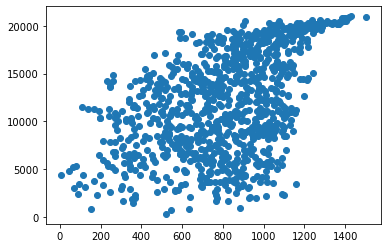

In [19]:
# Plot the x,y coordinates for every genres in enao_df
fig, ax = plt.subplots()
ax.scatter(enao_df['x'], enao_df['y'])
plt.show()

## Save the results

In [20]:
# Save the data
enao_df.to_pickle('../Data/pkl/02_everynoise_data.pkl')
enao_df.to_csv('../Data/csv/02_everynoise_data.csv')  # For visualization